# Samuel Chiang USCID: 7187956023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from IPython.display import display
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import GridSearchCV
from scipy.spatial import distance

warnings.filterwarnings("ignore")

# 1. Supervised, Semi-Supervised, and Unsupervised Learning

## (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:<br>https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes. Use the first 20% of the positive and negative classes in the file as the test set and the rest as the training set.

In [2]:
df = pd.read_csv('data/wdbc.data', header = None)
df = df.replace("B", 0) 
df = df.replace("M", 1)
df_M=df.loc[df[1]==1]
df_B=df.loc[df[1]==0]

## (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, un- supervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and nega- tive classes as the test set). Then compare the average scores (accuracy, precision, recall, F-score, and AUC) that you obtain from each algorithm.

In [3]:
mc_column = ['Algorithm', 'Average Accuracy', 'Average Precision', 'Average Recall', 'Average F-Score', 'Average AUC']
algorithm_scores=pd.DataFrame(columns = mc_column)

### i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

Training Set Metrics:


,Iteration,Parameters,Accuracy,Precision,Recall,F-Score,AUC
0,1,{'C': 1},0.984581,0.993902,0.964497,0.978979,0.980494
1,2,{'C': 1},0.986784,0.993939,0.970414,0.982036,0.983453
2,3,{'C': 1},0.988987,0.993976,0.976331,0.985075,0.986411
3,4,{'C': 1},0.980176,0.987805,0.958580,0.972973,0.975781
4,5,{'C': 20},0.986784,0.988024,0.976331,0.982143,0.984657
5,6,{'C': 1},0.977974,0.976048,0.964497,0.970238,0.975231
6,7,{'C': 5},0.988987,1.000000,0.970414,0.984985,0.985207
7,8,{'C': 5},0.993392,1.000000,0.982249,0.991045,0.991124
8,9,{'C': 1},0.986784,1.000000,0.964497,0.981928,0.982249
9,10,{'C': 1},0.988987,1.000000,0.970414,0.984985,0.985207



Testing Set Metrics:


,Iteration,Parameters,Accuracy,Precision,Recall,F-Score,AUC
0,1,{'C': 1},0.913043,0.836735,0.953488,0.891304,0.921189
1,2,{'C': 1},0.956522,0.913043,0.976744,0.943820,0.960594
2,3,{'C': 1},0.956522,1.000000,0.883721,0.938272,0.941860
3,4,{'C': 1},0.965217,1.000000,0.906977,0.951220,0.953488
4,5,{'C': 20},0.886957,0.767857,1.000000,0.868687,0.909722
5,6,{'C': 1},0.913043,0.823529,0.976744,0.893617,0.925872
6,7,{'C': 5},0.973913,0.934783,1.000000,0.966292,0.979167
7,8,{'C': 5},0.904348,0.796296,1.000000,0.886598,0.923611
8,9,{'C': 1},0.991304,1.000000,0.976744,0.988235,0.988372
9,10,{'C': 1},0.956522,1.000000,0.883721,0.938272,0.941860



Confusion matrix and ROC for training of Last Iteration:
[[284   1]
 [  6 163]]


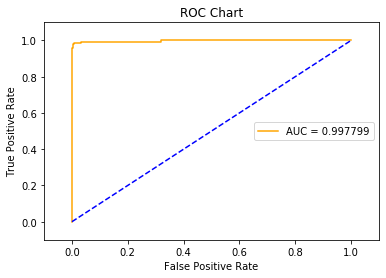


Confusion matrix and ROC for testing of Last Iteration:
[[72  0]
 [ 3 40]]


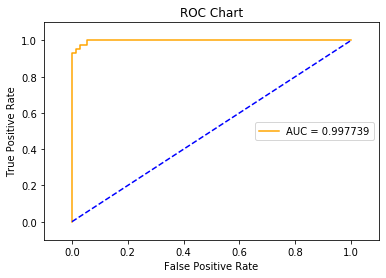

In [4]:
M=30
column = ['Iteration','Parameters','Accuracy', 'Precision', 'Recall', 'F-Score', 'AUC']
supervised_learning_train=pd.DataFrame(columns = column)
supervised_learning_test=pd.DataFrame(columns = column)
last_y_train_pred=[]
last_y_train_score=[]
last_y_train=[]
last_y_test_pred=[]
last_y_test_score=[]
last_y_test=[]

for i in range(M):
    train_df_M, test_df_M = train_test_split(df_M, test_size = 0.2)
    train_df_B, test_df_B = train_test_split(df_B, test_size = 0.2)
    
    # Concat them together to get entire dataset
    train_df = pd.concat([train_df_M, train_df_B], axis=0)
    test_df = pd.concat([test_df_M, test_df_B], axis=0)
    
    x_train = train_df.iloc[:,2:]
    y_train = train_df.iloc[:,1]
    x_test = test_df.iloc[:,2:]
    y_test = test_df.iloc[:,1]
    
    scaler = preprocessing.MinMaxScaler()
    standard_x_train = scaler.fit_transform(x_train)
    standard_x_test = scaler.fit_transform(x_test)
    x_train = pd.DataFrame(standard_x_train, columns=train_df.columns[2:])
    x_test = pd.DataFrame(standard_x_test, columns=train_df.columns[2:])
    
    parameters = {'C':[0.1, 1, 5, 10, 15, 20, 100, 1000]}
    lsvc = LinearSVC(penalty='l1', dual=False, max_iter = 5000, random_state=i)
    gridsearch=GridSearchCV(lsvc, parameters, cv=5, n_jobs=-1)
    gridsearch.fit(x_train, y_train)
    y_train_pred = gridsearch.predict(x_train)
    y_train_scores = gridsearch.decision_function(x_train)
    y_test_pred = gridsearch.predict(x_test)
    y_test_scores = gridsearch.decision_function(x_test)
    
    metrics = []
    metrics.append(i+1)
    metrics.append(gridsearch.best_params_)
    metrics.append(accuracy_score(y_train, y_train_pred))
    metrics.append(precision_score(y_train, y_train_pred))
    metrics.append(recall_score(y_train, y_train_pred))
    metrics.append(f1_score(y_train, y_train_pred))
    metrics.append(roc_auc_score(y_train, y_train_pred))
    metrics_row = pd.DataFrame([metrics], columns=column)
    supervised_learning_train = supervised_learning_train.append(metrics_row, ignore_index = True)
    
    metrics = []
    metrics.append(i+1)
    metrics.append(gridsearch.best_params_)
    metrics.append(accuracy_score(y_test, y_test_pred))
    metrics.append(precision_score(y_test, y_test_pred))
    metrics.append(recall_score(y_test, y_test_pred))
    metrics.append(f1_score(y_test, y_test_pred))
    metrics.append(roc_auc_score(y_test, y_test_pred))
    metrics_row = pd.DataFrame([metrics], columns=column)
    supervised_learning_test = supervised_learning_test.append(metrics_row, ignore_index = True)
    
    if i == 29:
        last_y_train_pred=y_train_pred
        last_y_train_scores=y_train_scores
        last_y_train=y_train
        last_y_test_pred=y_test_pred
        last_y_test_scores=y_test_scores
        last_y_test=y_test
    
print("Training Set Metrics:")
display(supervised_learning_train)

print("\nTesting Set Metrics:")
display(supervised_learning_test)

print('\nConfusion matrix and ROC for training of Last Iteration:')
print(confusion_matrix(last_y_train, last_y_train_pred))
# Plot ROC
fpr, tpr, thresholds = roc_curve(last_y_train, last_y_train_scores)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='orange', label='AUC = %f' % roc_auc)
plt.legend(loc="right")
plt.plot([0, 1], [0, 1], color='blue',  linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Chart')
plt.show()


print('\nConfusion matrix and ROC for testing of Last Iteration:')
print(confusion_matrix(last_y_test, last_y_test_pred))
# Plot ROC
fpr, tpr, thresholds = roc_curve(last_y_test, last_y_test_scores)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='orange', label='AUC = %f' % roc_auc)
plt.legend(loc="right")
plt.plot([0, 1], [0, 1], color='blue',  linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Chart')
plt.show()

In [5]:
supervised_train = ['Supervised: Train'] + [i for i in supervised_learning_train.mean(axis = 0)[1:]]
supervised_test = ['Supervised: Test'] + [i for i in supervised_learning_test.mean(axis = 0)[1:]]
print(supervised_train)
algorithm_scores.loc[0] = supervised_train
algorithm_scores.loc[1] = supervised_test
algorithm_scores

['Supervised: Train', 0.9856828193832601, 0.9907696372454298, 0.9706114398422088, 0.9805650473706643, 0.9826156614415725]


,Algorithm,Average Accuracy,Average Precision,Average Recall,Average F-Score,Average AUC
0,Supervised: Train,0.985683,0.990770,0.970611,0.980565,0.982616
1,Supervised: Test,0.917681,0.858851,0.963566,0.902392,0.926922


### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

### B. Find the unlabeled datapoint that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

Training Set Metrics:


,Iteration,Parameters,Accuracy,Precision,Recall,F-Score,AUC
0,1,{'C': 5},0.977974,0.987730,0.952663,0.969880,0.972823
1,2,{'C': 5},0.982379,0.982036,0.970414,0.976190,0.979944
2,3,{'C': 1},0.975771,0.981707,0.952663,0.966967,0.971068
3,4,{'C': 1},0.980176,0.976190,0.970414,0.973294,0.978190
4,5,{'C': 10},0.991189,0.994012,0.982249,0.988095,0.989370
5,6,{'C': 1},0.973568,0.975758,0.952663,0.964072,0.969314
6,7,{'C': 5},0.969163,0.969697,0.946746,0.958084,0.964601
7,8,{'C': 1},0.977974,1.000000,0.940828,0.969512,0.970414
8,9,{'C': 1},0.971366,0.969880,0.952663,0.961194,0.967559
9,10,{'C': 20},0.982379,0.976331,0.976331,0.976331,0.981148



Testing Set Metrics:


,Iteration,Parameters,Accuracy,Precision,Recall,F-Score,AUC
0,1,{'C': 5},0.982609,0.976744,0.976744,0.976744,0.981428
1,2,{'C': 5},0.921739,0.854167,0.953488,0.901099,0.928133
2,3,{'C': 1},0.973913,0.954545,0.976744,0.965517,0.974483
3,4,{'C': 1},0.930435,0.857143,0.976744,0.913043,0.939761
4,5,{'C': 10},0.973913,1.000000,0.930233,0.963855,0.965116
5,6,{'C': 1},0.817391,0.671875,1.000000,0.803738,0.854167
6,7,{'C': 5},0.843478,0.704918,1.000000,0.826923,0.875000
7,8,{'C': 1},0.956522,0.952381,0.930233,0.941176,0.951227
8,9,{'C': 1},0.947826,0.877551,1.000000,0.934783,0.958333
9,10,{'C': 20},0.956522,0.952381,0.930233,0.941176,0.951227



Confusion matrix and ROC for training of Last Iteration:
[[283   2]
 [  4 165]]


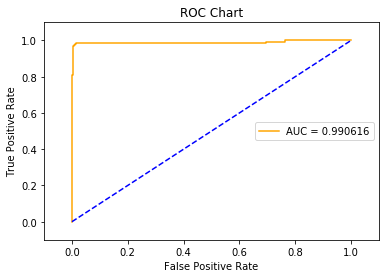


Confusion matrix and ROC for testing of Last Iteration:
[[72  0]
 [ 2 41]]


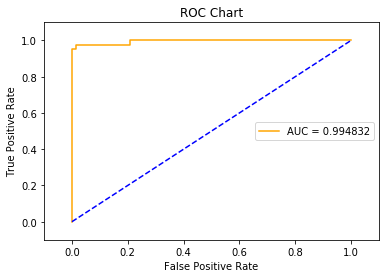

In [6]:
M=30
column = ['Iteration','Parameters','Accuracy', 'Precision', 'Recall', 'F-Score', 'AUC']
semisupervised_learning_train=pd.DataFrame(columns = column)
semisupervised_learning_test=pd.DataFrame(columns = column)
last_y_train_pred=[]
last_y_train_score=[]
last_y_train=[]
last_y_test_pred=[]
last_y_test_score=[]
last_y_test=[]

for i in range(M):
    #print('Iteration: ', i)
    train_df_M, test_df_M = train_test_split(df_M, test_size = 0.2)
    train_df_B, test_df_B = train_test_split(df_B, test_size = 0.2)
    # Concat them together to get entire dataset
    train_df = pd.concat([train_df_M, train_df_B], axis=0)
    test_df = pd.concat([test_df_M, test_df_B], axis=0)
    
    x_train = train_df.iloc[:,2:]
    y_train = train_df.iloc[:,1]
    x_test = test_df.iloc[:,2:]
    y_test = test_df.iloc[:,1]
   
    scaler = preprocessing.MinMaxScaler()
    standard_x_train = scaler.fit_transform(x_train.values)
    standard_x_test = scaler.fit_transform(x_test)
    scaled_train_df = pd.DataFrame(standard_x_train)
    scaled_train_df.columns = train_df.columns[2:]
    x_train = pd.DataFrame(standard_x_train, columns=train_df.columns[2:])
    x_test = pd.DataFrame(standard_x_test, columns=train_df.columns[2:])
    
    scaled_train_df.insert(0,1,y_train.values)
    
    labeled_M_df, unlabeled_M_df = train_test_split(scaled_train_df.loc[scaled_train_df.iloc[:,0] == 1], test_size = 0.5)
    labeled_B_df, unlabeled_B_df = train_test_split(scaled_train_df.loc[scaled_train_df.iloc[:,0] == 0], test_size = 0.5)
    # Concat labled and unlabeled together
    labeled_train_df = pd.concat([labeled_M_df, labeled_B_df], axis=0)
    unlabeled_train_df = pd.concat([unlabeled_M_df, unlabeled_B_df], axis=0)
    
    #labeled data
    labeled_x_train = labeled_train_df.iloc[:,1:]
    labeled_y_train = labeled_train_df.iloc[:,0]
    parameters = {'C':[1, 5, 10, 15, 20, 100]}
    lsvc = LinearSVC(penalty='l1', dual=False, max_iter = 5000)
    gridsearch = GridSearchCV(lsvc, param_grid=parameters, cv=5)
    gridsearch.fit(labeled_x_train, labeled_y_train)
    
    
    #unlabeled data
    while unlabeled_train_df.shape[0] != 0:
        # Determine distance from remaining data points in the training set to the hyperplane of the SVM
        unlabeled_train_df[1] = gridsearch.predict(unlabeled_train_df.iloc[:,1:]) # Predict Label using SVM
        #print(unlabeled_train_df)
        unlabeled_train_df['Distance'] = np.abs(gridsearch.decision_function(unlabeled_train_df.iloc[:,1:])) # Determine Distance
        unlabeled_train_df = unlabeled_train_df.sort_values(by=['Distance'], ascending=False) 
        #print(unlabeled_train_df)
        selected_datapoint = unlabeled_train_df.iloc[0,:-1].to_frame().transpose() # Datapoint with largest distance
        unlabeled_train_df = unlabeled_train_df.iloc[1:,:-1]
        labeled_train_df = pd.concat([labeled_train_df, selected_datapoint], axis=0)
        labeled_x_train = labeled_train_df.iloc[:,1:]
        labeled_y_train = labeled_train_df.iloc[:,0]
        # print(unlabeled_train_df.shape[0])
        # retrain with new datapoint added
        gridsearch.fit(labeled_x_train, labeled_y_train) 
        
    
    y_train_pred = gridsearch.predict(x_train)
    y_train_scores = gridsearch.decision_function(x_train)
    y_test_pred = gridsearch.predict(x_test)
    y_test_scores = gridsearch.decision_function(x_test)
    
    metrics = []
    metrics.append(i+1)
    metrics.append(gridsearch.best_params_)
    metrics.append(accuracy_score(y_train, y_train_pred))
    metrics.append(precision_score(y_train, y_train_pred))
    metrics.append(recall_score(y_train, y_train_pred))
    metrics.append(f1_score(y_train, y_train_pred))
    metrics.append(roc_auc_score(y_train, y_train_pred))
    metrics_row = pd.DataFrame([metrics], columns=column)
    semisupervised_learning_train = semisupervised_learning_train.append(metrics_row, ignore_index = True)
    
    metrics = []
    metrics.append(i+1)
    metrics.append(gridsearch.best_params_)
    metrics.append(accuracy_score(y_test, y_test_pred))
    metrics.append(precision_score(y_test, y_test_pred))
    metrics.append(recall_score(y_test, y_test_pred))
    metrics.append(f1_score(y_test, y_test_pred))
    metrics.append(roc_auc_score(y_test, y_test_pred))
    metrics_row = pd.DataFrame([metrics], columns=column)
    semisupervised_learning_test = semisupervised_learning_test.append(metrics_row, ignore_index = True)
    
    if i == M-1:
        last_y_train_pred=y_train_pred
        last_y_train_scores=y_train_scores
        last_y_train=y_train
        last_y_test_pred=y_test_pred
        last_y_test_scores=y_test_scores
        last_y_test=y_test
    
print("Training Set Metrics:")
display(semisupervised_learning_train)

print("\nTesting Set Metrics:")
display(semisupervised_learning_test)

print('\nConfusion matrix and ROC for training of Last Iteration:')
print(confusion_matrix(last_y_train, last_y_train_pred))
# Plot ROC
fpr, tpr, thresholds = roc_curve(last_y_train, last_y_train_scores)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='orange', label='AUC = %f' % roc_auc)
plt.legend(loc="right")
plt.plot([0, 1], [0, 1], color='blue',  linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Chart')
plt.show()


print('\nConfusion matrix and ROC for testing of Last Iteration:')
print(confusion_matrix(last_y_test, last_y_test_pred))
# Plot ROC
fpr, tpr, thresholds = roc_curve(last_y_test, last_y_test_scores)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='orange', label='AUC = %f' % roc_auc)
plt.legend(loc="right")
plt.plot([0, 1], [0, 1], color='blue',  linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Chart')
plt.show()

In [7]:
semisupervised_train = ['Semi-Supervised: Train'] + [i for i in semisupervised_learning_train.mean(axis = 0)[1:]]
semisupervised_test = ['Semi-Supervised: Test'] + [i for i in semisupervised_learning_test.mean(axis = 0)[1:]]
algorithm_scores.loc[2] = semisupervised_train
algorithm_scores.loc[3] = semisupervised_test
algorithm_scores

,Algorithm,Average Accuracy,Average Precision,Average Recall,Average F-Score,Average AUC
0,Supervised: Train,0.985683,0.990770,0.970611,0.980565,0.982616
1,Supervised: Test,0.917681,0.858851,0.963566,0.902392,0.926922
2,Semi-Supervised: Train,0.976799,0.980808,0.956607,0.968438,0.972690
3,Semi-Supervised: Test,0.914203,0.871703,0.948062,0.899250,0.921022


### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

*We can run K-means multiple times and then choose the run that gives the lowest error. In the KMeans library, the default number of times the k-means algorithm will be run is 10 times, but we can increase this by setting the value of "n_init". The final results will be the best output of "n_init" consecutive runs. If you run this k^n times and then choose the best out of that, then you would be guaranteed you're finding a global minima, but that's too time consuming to be practical.*

### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

### C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

Empty DataFrame
Columns: [Iteration, Clusters, Accuracy, Precision, Recall, F-Score, AUC]
Index: []
Training Set Metrics:


,Iteration,Clusters,Accuracy,Precision,Recall,F-Score,AUC
0,1,2,0.832599,0.989474,0.556213,0.712121,0.776352
1,2,2,0.852423,1.000000,0.603550,0.752768,0.801775
2,3,2,0.867841,0.990991,0.650888,0.785714,0.823689
3,4,2,0.856828,0.990566,0.621302,0.763636,0.808897
4,5,2,0.859031,0.990654,0.627219,0.768116,0.811855
5,6,2,0.837004,1.000000,0.562130,0.719697,0.781065
6,7,2,0.850220,0.990291,0.603550,0.750000,0.800021
7,8,2,0.859031,0.990654,0.627219,0.768116,0.811855
8,9,2,0.856828,1.000000,0.615385,0.761905,0.807692
9,10,2,0.852423,0.990385,0.609467,0.754579,0.802979



Testing Set Metrics:


,Iteration,Clusters,Accuracy,Precision,Recall,F-Score,AUC
0,1,2,0.869565,1.000000,0.651163,0.788732,0.825581
1,2,2,0.860870,0.965517,0.651163,0.777778,0.818637
2,3,2,0.800000,1.000000,0.465116,0.634921,0.732558
3,4,2,0.834783,1.000000,0.558140,0.716418,0.779070
4,5,2,0.834783,1.000000,0.558140,0.716418,0.779070
5,6,2,0.869565,0.966667,0.674419,0.794521,0.830265
6,7,2,0.869565,1.000000,0.651163,0.788732,0.825581
7,8,2,0.834783,1.000000,0.558140,0.716418,0.779070
8,9,2,0.834783,0.961538,0.581395,0.724638,0.783753
9,10,2,0.860870,1.000000,0.627907,0.771429,0.813953



Confusion matrix and ROC for training of Last Iteration:
[[285   0]
 [ 64 105]]


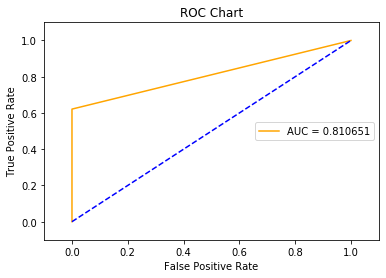


Confusion matrix and ROC for testing of Last Iteration:
[[71  1]
 [18 25]]


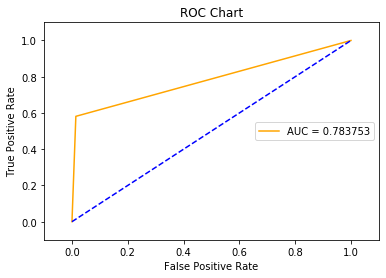

In [8]:
def dist1(row):
    return distance.euclidean(kmeans.cluster_centers_[0], row.iloc[2:].tolist())
def dist2(row):
    return distance.euclidean(kmeans.cluster_centers_[1], row.iloc[2:-1].tolist())
column = ['Iteration','Clusters','Accuracy', 'Precision', 'Recall', 'F-Score', 'AUC']

kmeans_learning_train=pd.DataFrame(columns = column)
kmeans_learning_test=pd.DataFrame(columns = column)
last_y_train_pred=[]
last_y_train_score=[]
last_y_train=[]
last_y_test_pred=[]
last_y_test_score=[]
last_y_test=[]
print(kmeans_learning_train)
for i in range(M):
    train_df_M, test_df_M = train_test_split(df_M, test_size = 0.2)
    train_df_B, test_df_B = train_test_split(df_B, test_size = 0.2)
    
    # Concat them together to get entire dataset
    train_df = pd.concat([train_df_M, train_df_B], axis=0)
    test_df = pd.concat([test_df_M, test_df_B], axis=0)
    
    
    # k-means algorithm with 2 clusters
    kmeans = KMeans(n_clusters=2,init='random',n_init=100)
    kmeans.fit(train_df.iloc[:,2:])  
    k_labels = kmeans.labels_

    # Determine distance from each point to cluster centroid
    centroid_df = train_df.copy()
    centroid_df['distance_1'] = centroid_df.apply(dist1, axis=1)
    centroid_df['distance_2'] = centroid_df.apply(dist2, axis=1)

    # Determine of each cluster based on majority poll of true label for 30 closest datapoints
    clabel_1 = centroid_df.sort_values(by='distance_1').iloc[:30, [1]][1].value_counts().index[0]
    clabel_2 = centroid_df.sort_values(by='distance_2').iloc[:30, [1]][1].value_counts().index[0]

    # Compare labels provided by k-means with true labels of training data
    cluster_train_df = train_df.copy()
    cluster_train_df['cluster'] = kmeans.labels_
    cluster_train_df['prediction'] = cluster_train_df.apply(lambda x: clabel_1 if x['cluster'] == 0 else clabel_2, axis=1)
    
    # Determine metrics for training set
    y_train = cluster_train_df[1]
    y_train_pred = cluster_train_df['prediction']
    
    
    # Determine distance between each test datapoint and cluster centroid
    cluster_test_df = test_df.copy()
    cluster_test_df['distance_1'] = cluster_test_df.apply(dist1, axis=1)
    cluster_test_df['distance_2'] = cluster_test_df.apply(dist2, axis=1)
    # Classify based on proximity
    cluster_test_df['prediction'] = cluster_test_df.apply(lambda x: clabel_1 if x['distance_1'] < x['distance_2'] else clabel_2, axis=1)
    # Determine metrics for test set
    y_test = cluster_test_df[1]
    y_test_pred = cluster_test_df['prediction']
    
    metrics = []
    metrics.append(i+1)
    metrics.append(kmeans.n_clusters)
    metrics.append(accuracy_score(y_train, y_train_pred))
    metrics.append(precision_score(y_train, y_train_pred))
    metrics.append(recall_score(y_train, y_train_pred))
    metrics.append(f1_score(y_train, y_train_pred))
    metrics.append(roc_auc_score(y_train, y_train_pred))
    metrics_row = pd.DataFrame([metrics], columns=column)
    kmeans_learning_train = kmeans_learning_train.append(metrics_row, ignore_index = True)
    
    
    metrics = []
    metrics.append(i+1)
    metrics.append(kmeans.n_clusters)
    metrics.append(accuracy_score(y_test, y_test_pred))
    metrics.append(precision_score(y_test, y_test_pred))
    metrics.append(recall_score(y_test, y_test_pred))
    metrics.append(f1_score(y_test, y_test_pred))
    metrics.append(roc_auc_score(y_test, y_test_pred))
    metrics_row = pd.DataFrame([metrics], columns=column)
    kmeans_learning_test = kmeans_learning_test.append(metrics_row, ignore_index = True)
    
    if i == M-1:
        last_y_train_pred=y_train_pred
        last_y_train_scores=y_train_scores
        last_y_train=y_train
        last_y_test_pred=y_test_pred
        last_y_test_scores=y_test_scores
        last_y_test=y_test
    
print("Training Set Metrics:")
display(kmeans_learning_train)

print("\nTesting Set Metrics:")
display(kmeans_learning_test)

print('\nConfusion matrix and ROC for training of Last Iteration:')
print(confusion_matrix(last_y_train, last_y_train_pred))
# Plot ROC
fpr, tpr, thresholds = roc_curve(last_y_train, last_y_train_pred)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='orange', label='AUC = %f' % roc_auc)
plt.legend(loc="right")
plt.plot([0, 1], [0, 1], color='blue',  linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Chart')
plt.show()


print('\nConfusion matrix and ROC for testing of Last Iteration:')
print(confusion_matrix(last_y_test, last_y_test_pred))
# Plot ROC
fpr, tpr, thresholds = roc_curve(last_y_test, last_y_test_pred)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='orange', label='AUC = %f' % roc_auc)
plt.legend(loc="right")
plt.plot([0, 1], [0, 1], color='blue',  linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Chart')
plt.show()

In [9]:
kmeans_train = ['Unsupervised K-means: Train'] + [i for i in kmeans_learning_train.mean(axis = 0)[2:]]
kmeans_test = ['Unsupervised K-means: Test'] + [i for i in kmeans_learning_test.mean(axis = 0)[2:]]
algorithm_scores.loc[4] = kmeans_train
algorithm_scores.loc[5] = kmeans_test
algorithm_scores

,Algorithm,Average Accuracy,Average Precision,Average Recall,Average F-Score,Average AUC
0,Supervised: Train,0.985683,0.990770,0.970611,0.980565,0.982616
1,Supervised: Test,0.917681,0.858851,0.963566,0.902392,0.926922
2,Semi-Supervised: Train,0.976799,0.980808,0.956607,0.968438,0.972690
3,Semi-Supervised: Test,0.914203,0.871703,0.948062,0.899250,0.921022
4,Unsupervised K-means: Train,0.852056,0.992290,0.607298,0.753254,0.802245
5,Unsupervised K-means: Test,0.853043,0.992791,0.611628,0.754966,0.804425


### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clus- tering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

Training Set Metrics:


,Iteration,Clusters,Accuracy,Precision,Recall,F-Score,AUC
0,1,2,0.856828,0.990566,0.621302,0.763636,0.808897
1,2,2,0.894273,0.976378,0.733728,0.837838,0.861601
2,3,2,0.859031,0.972973,0.639053,0.771429,0.814263
3,4,2,0.859031,0.981651,0.633136,0.769784,0.813059
4,5,2,0.856828,0.972727,0.633136,0.767025,0.811305
5,6,2,0.839207,0.970588,0.585799,0.730627,0.787636
6,7,2,0.874449,0.982759,0.674556,0.800000,0.833769
7,8,2,0.850220,0.971963,0.615385,0.753623,0.802429
8,9,2,0.865639,0.982143,0.650888,0.782918,0.821935
9,10,2,0.874449,0.982759,0.674556,0.800000,0.833769



Testing Set Metrics:


,Iteration,Clusters,Accuracy,Precision,Recall,F-Score,AUC
0,1,2,0.843478,0.931034,0.627907,0.750000,0.800065
1,2,2,0.686957,1.000000,0.162791,0.280000,0.581395
2,3,2,0.808696,1.000000,0.488372,0.656250,0.744186
3,4,2,0.860870,0.965517,0.651163,0.777778,0.818637
4,5,2,0.843478,1.000000,0.581395,0.735294,0.790698
5,6,2,0.747826,1.000000,0.325581,0.491228,0.662791
6,7,2,0.904348,1.000000,0.744186,0.853333,0.872093
7,8,2,0.886957,1.000000,0.697674,0.821918,0.848837
8,9,2,0.791304,1.000000,0.441860,0.612903,0.720930
9,10,2,0.834783,0.961538,0.581395,0.724638,0.783753



Confusion matrix and ROC for training of Last Iteration:
[[284   1]
 [ 60 109]]


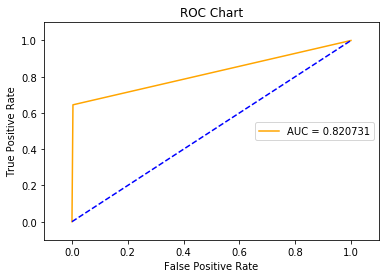


Confusion matrix and ROC for testing of Last Iteration:
[[66  6]
 [15 28]]


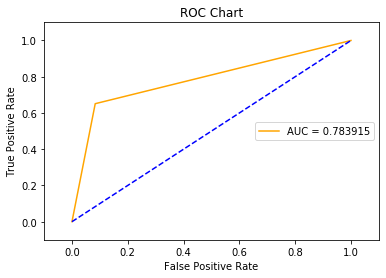

In [10]:
spectral_learning_train=pd.DataFrame(columns = column)
spectral_learning_test=pd.DataFrame(columns = column)
last_y_train_pred=[]
last_y_train_score=[]
last_y_train=[]
last_y_test_pred=[]
last_y_test_score=[]
last_y_test=[]

for i in range(M):
    train_df_M, test_df_M = train_test_split(df_M, test_size = 0.2)
    train_df_B, test_df_B = train_test_split(df_B, test_size = 0.2)
    
    # Concat them together to get entire dataset
    train_df = pd.concat([train_df_M, train_df_B], axis=0)
    test_df = pd.concat([test_df_M, test_df_B], axis=0)
    
    
    # Normalize the data
    scaler = preprocessing.MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df.iloc[:,2:])
    x_train = pd.DataFrame(scaled_train, columns=train_df.columns[2:])
    
    scaled_test = scaler.fit_transform(test_df.iloc[:,2:])
    x_test = pd.DataFrame(scaled_test, columns=train_df.columns[2:])

    # Use 2 clusters and n_init=100 similar to (b)iii
    spectral = SpectralClustering(n_clusters=2, n_init=100, gamma=1.0, affinity='rbf')
    labels = spectral.fit_predict(x_train)
    
    # Determine which cluster each datapoint is in
    spectral_train_df =  train_df.copy()
    spectral_train_df['Cluster'] = labels
    
    # Label datapoints based on majority label of each cluster 
    for c in range (0,2):
        majority = spectral_train_df[spectral_train_df.Cluster == c][1].value_counts().index[0]
        spectral_train_df.loc[spectral_train_df.Cluster == c, 'prediction'] = majority
    spectral_train_df['prediction'] = spectral_train_df['prediction'].astype(int)
    
    # Determine metrics for training set
    y_train = spectral_train_df[1]
    y_train_pred = spectral_train_df['prediction']
    
    spectral_test_df =  test_df.copy()
    labels = spectral.fit_predict(x_test)
    spectral_test_df['Cluster'] = labels
    
    # Label based on majority label of each cluster 
    for c in range (0,2):
        majority = spectral_test_df[spectral_test_df.Cluster == c][1].value_counts().index[0]
        spectral_test_df.loc[spectral_test_df.Cluster == c, 'prediction'] = majority
    spectral_test_df['prediction'] = spectral_test_df['prediction'].astype(int)

    y_test = spectral_test_df[1]
    y_test_pred = spectral_test_df['prediction']

    
    metrics = []
    metrics.append(i+1)
    metrics.append(spectral.n_clusters)
    metrics.append(accuracy_score(y_train, y_train_pred))
    metrics.append(precision_score(y_train, y_train_pred))
    metrics.append(recall_score(y_train, y_train_pred))
    metrics.append(f1_score(y_train, y_train_pred))
    metrics.append(roc_auc_score(y_train, y_train_pred))
    metrics_row = pd.DataFrame([metrics], columns=column)
    spectral_learning_train = spectral_learning_train.append(metrics_row, ignore_index = True)
    
    metrics = []
    metrics.append(i+1)
    metrics.append(spectral.n_clusters)
    metrics.append(accuracy_score(y_test, y_test_pred))
    metrics.append(precision_score(y_test, y_test_pred))
    metrics.append(recall_score(y_test, y_test_pred))
    metrics.append(f1_score(y_test, y_test_pred))
    metrics.append(roc_auc_score(y_test, y_test_pred))
    metrics_row = pd.DataFrame([metrics], columns=column)
    spectral_learning_test = spectral_learning_test.append(metrics_row, ignore_index = True)
    
    if i == M-1:
        last_y_train_pred=y_train_pred
        last_y_train_scores=y_train_scores
        last_y_train=y_train
        last_y_test_pred=y_test_pred
        last_y_test_scores=y_test_scores
        last_y_test=y_test
    
print("Training Set Metrics:")
display(spectral_learning_train)

print("\nTesting Set Metrics:")
display(spectral_learning_test)

print('\nConfusion matrix and ROC for training of Last Iteration:')
print(confusion_matrix(last_y_train, last_y_train_pred))
# Plot ROC
fpr, tpr, thresholds = roc_curve(last_y_train, last_y_train_pred)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='orange', label='AUC = %f' % roc_auc)
plt.legend(loc="right")
plt.plot([0, 1], [0, 1], color='blue',  linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Chart')
plt.show()


print('\nConfusion matrix and ROC for testing of Last Iteration:')
print(confusion_matrix(last_y_test, last_y_test_pred))
# Plot ROC
fpr, tpr, thresholds = roc_curve(last_y_test, last_y_test_pred)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='orange', label='AUC = %f' % roc_auc)
plt.legend(loc="right")
plt.plot([0, 1], [0, 1], color='blue',  linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Chart')
plt.show()

In [11]:
spectral_clustering_train = ['Unsupervised Spectral Clustering: Train'] + [i for i in spectral_learning_train.mean(axis = 0)[2:]]
spectral_clustering_test = ['Unsupervised Spectral Clustering: Test'] + [i for i in spectral_learning_test.mean(axis = 0)[2:]]
algorithm_scores.loc[6] = spectral_clustering_train
algorithm_scores.loc[7] = spectral_clustering_test
algorithm_scores

,Algorithm,Average Accuracy,Average Precision,Average Recall,Average F-Score,Average AUC
0,Supervised: Train,0.985683,0.990770,0.970611,0.980565,0.982616
1,Supervised: Test,0.917681,0.858851,0.963566,0.902392,0.926922
2,Semi-Supervised: Train,0.976799,0.980808,0.956607,0.968438,0.972690
3,Semi-Supervised: Test,0.914203,0.871703,0.948062,0.899250,0.921022
4,Unsupervised K-means: Train,0.852056,0.992290,0.607298,0.753254,0.802245
5,Unsupervised K-means: Test,0.853043,0.992791,0.611628,0.754966,0.804425
6,Unsupervised Spectral Clustering: Train,0.857195,0.982611,0.627613,0.764545,0.810473
7,Unsupervised Spectral Clustering: Test,0.826377,0.983341,0.547287,0.683994,0.770171


### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

*As expected, the accuracy on both the training set and the test set in supervised learning is better than semi-supervised learning. However, the semi-supervised test accuracy is not too far off from the supervised test accuracy. This might imply that the amount of data we fed into the semi-supervised model could be adequete enough for satisfactory results. On the other hand, both Unsupervised learning methods underperformed compared to the other two methods just mentioned. Although the accuracies of unsupervised methods had ok results, they are still quite far off from the results of both semi-supervised and supervised models.*

# 2. Active Learning Using Support Vector Machines

## (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points ran- domly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [14]:
df = pd.read_csv('data/data_banknote_authentication.txt', header=None)
train_df, test_df = train_test_split(df, test_size = 472)
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]

##  (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

### i. Train a SVM with a pool of 10 randomly selected datapoints from the training set using linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [16]:
M=50
all_passive_errors = pd.DataFrame(columns=list(range(10,910,10)))

for i in range(M):
    size=0
    errors = []
    unused = train_df.copy()
    selected_df = pd.DataFrame(columns=df.columns)
    
    while size!=900:
        if unused.shape[0]==10:
            selected_df = pd.concat([selected_df, unused], axis=0)
        else:
            remaining, selected = train_test_split(unused, test_size=10)
            if size==0:
                while (selected[selected.iloc[:,-1] == 0].shape[0] <= 2) \
                or (selected[selected.iloc[:,-1] == 1].shape[0] <= 2):
                    remaining, selected = train_test_split(unused, test_size=10)
            unused = remaining
            selected_df = pd.concat([selected_df, selected], axis=0)  
        size+=10
        
        x_train = selected_df.iloc[:,:-1]
        y_train = selected_df.iloc[:,-1]
        y_train = y_train.astype('int')

        # Train a SVM with linear kernel and L1 Peanlty
        parameters = {'C':[0.1, 1, 5, 10, 15, 20, 100]}
        lvsc = LinearSVC(penalty= 'l1', dual=False, max_iter = 5000, random_state=i)
        
        # Set CV to 5 if training set size is 10 since cannot perform CV = 10
        if selected_df.shape[0] == 10:        
            CV = 5
        else:
            CV = 10
        
        gridsearch = GridSearchCV(lvsc, param_grid=parameters, cv=CV, scoring = 'accuracy') 
        gridsearch.fit(x_train, y_train)
        # Determine error and append to list
        error = 1 - gridsearch.score(x_test, y_test)
        errors.append(error)

    all_passive_errors.loc[i+1] = errors
#     print('Iteration %d:' %(i))
#     display(errors)
print('All Errors for each Iteration')
pd.set_option('display.max_columns', 100)
all_passive_errors

All Errors for each Iteration


,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900
1,0.042373,0.044492,0.033898,0.025424,0.016949,0.012712,0.010593,0.012712,0.016949,0.006356,0.010593,0.006356,0.016949,0.016949,0.016949,0.016949,0.006356,0.016949,0.010593,0.016949,0.012712,0.010593,0.006356,0.006356,0.010593,0.006356,0.010593,0.010593,0.006356,0.006356,0.006356,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.016949,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.016949,0.010593,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.010593,0.016949,0.016949,0.010593,0.006356,0.006356,0.006356,0.010593,0.006356,0.006356,0.006356,0.006356,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.006356,0.006356
2,0.146186,0.016949,0.052966,0.044492,0.029661,0.010593,0.012712,0.012712,0.016949,0.014831,0.014831,0.016949,0.012712,0.016949,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.023305,0.023305,0.016949,0.016949,0.016949,0.008475,0.006356,0.008475,0.008475,0.008475,0.010593,0.008475,0.008475,0.008475,0.008475,0.006356,0.006356,0.006356,0.006356,0.006356,0.008475,0.010593,0.006356,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.016949,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.016949,0.016949,0.016949,0.016949,0.016949,0.010593,0.010593,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
3,0.175847,0.108051,0.044492,0.036017,0.042373,0.025424,0.023305,0.033898,0.025424,0.033898,0.033898,0.027542,0.027542,0.027542,0.027542,0.027542,0.027542,0.027542,0.027542,0.027542,0.027542,0.023305,0.016949,0.016949,0.016949,0.012712,0.012712,0.014831,0.014831,0.014831,0.014831,0.010593,0.010593,0.014831,0.014831,0.010593,0.010593,0.010593,0.014831,0.012712,0.014831,0.014831,0.012712,0.012712,0.023305,0.023305,0.021186,0.021186,0.021186,0.021186,0.016949,0.016949,0.016949,0.016949,0.016949,0.023305,0.021186,0.010593,0.006356,0.006356,0.010593,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.010593,0.010593,0.010593,0.006356,0.006356,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
4,0.194915,0.016949,0.016949,0.008475,0.008475,0.008475,0.016949,0.019068,0.010593,0.006356,0.010593,0.010593,0.010593,0.016949,0.016949,0.004237,0.010593,0.004237,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.008475,0.010593,0.010593,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
5,0.150424,0.095339,0.031780,0.021186,0.021186,0.040254,0.006356,0.006356,0.006356,0.014831,0.008475,0.006356,0.006356,0.008475,0.008475,0.008475,0.008475,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.010593,0.010593,0.006356,0.010593,0.010593,0.010593,0.006356,0.010593,0.010593,0.

### ii. Train a SVM with a pool of 10 randomly selected datapoints from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 10-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [17]:
M=50
all_active_errors = pd.DataFrame(columns=list(range(10,910,10)))

for i in range(M):
    size=0
    errors = []
    unused = train_df.copy()
    selected_df = pd.DataFrame(columns=df.columns)
    
    #randomly select first 10 points
    remaining, selected = train_test_split(unused, test_size=10)
    #print(selected)
    while (selected[selected.iloc[:,-1] == 0].shape[0] <= 2) \
        or (selected[selected.iloc[:,-1] == 1].shape[0] <= 2):
        remaining, selected = train_test_split(unused, test_size=10)
    unused = remaining
    selected_df = pd.concat([selected_df, selected], axis=0)  
    size+=10
    x_train = selected_df.iloc[:,:-1]
    y_train = selected_df.iloc[:,-1]
    y_train = y_train.astype('int')

    # Train a SVM with linear kernel and L1 Peanlty
    parameters = {'C':[0.1, 1, 5, 10, 15, 20, 100]}
    lvsc = LinearSVC(penalty= 'l1', dual=False, max_iter = 5000, random_state=i)
    gridsearch = GridSearchCV(lvsc, param_grid=parameters, cv=5, scoring = 'accuracy') 
    gridsearch.fit(x_train, y_train)
    # Determine error and append to list
    error = 1 - gridsearch.score(x_test, y_test)
    errors.append(error)
    
    while size!=900:
        unused['distance'] = np.abs(gridsearch.decision_function(unused.iloc[:, :4]))
        unused = unused.sort_values(by=['distance']) # Sort by distance
        
        # Chose the 10 closest datapoints to add to training pool
        #print(unused)
        selected = unused.iloc[0:10,:-1]
        unused = unused.iloc[10:,:-1]
        selected_df = pd.concat([selected_df, selected], axis=0)
        size+=10
        
        x_train = selected_df.iloc[:,:-1]
        y_train = selected_df.iloc[:,-1]
        y_train = y_train.astype('int')
    
        # Train new SVM using new pool
        lvsc = LinearSVC(penalty= 'l1', dual=False, max_iter = 5000)
        
        # Set CV = 10 for the rest of the training set sizes
        gridsearch = GridSearchCV(lvsc, param_grid=parameters, cv=10, scoring = 'accuracy')
        gridsearch.fit(x_train, y_train)
        error = 1 - gridsearch.score(x_test,y_test)
        errors.append(error)
    

    all_active_errors.loc[i+1] = errors
#     print('Iteration %d:' %(i))
#     display(errors)
print('All Errors for each Iteration')
pd.set_option('display.max_columns', 100)
all_active_errors

All Errors for each Iteration


,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900
1,0.131356,0.052966,0.016949,0.025424,0.006356,0.004237,0.004237,0.008475,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.010593,0.010593,0.010593,0.006356,0.006356,0.006356,0.006356,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.010593,0.006356,0.010593,0.006356,0.006356,0.006356,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.010593
2,0.118644,0.033898,0.012712,0.016949,0.023305,0.019068,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.010593,0.006356,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
3,0.144068,0.050847,0.029661,0.029661,0.025424,0.019068,0.010593,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
4,0.146186,0.065678,0.050847,0.036017,0.031780,0.023305,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
5,0.156780,0.057203,0.010593,0.004237,0.004237,0.004237,0.008475,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.

## (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

In [18]:
print('Average Passive Learning Errors')
average_passive_errors = all_passive_errors.mean(axis = 0).to_frame().transpose()
average_passive_errors.index = ['mean']
display(average_passive_errors)
print('Average Active Learning Errors')
average_active_errors = all_active_errors.mean(axis = 0).to_frame().transpose()
average_active_errors.index = ['mean']
display(average_active_errors)

Average Passive Learning Errors


,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900
mean,0.139788,0.067415,0.044831,0.039407,0.024746,0.021568,0.019025,0.019746,0.018347,0.017585,0.017161,0.016525,0.016568,0.015593,0.014534,0.014237,0.014788,0.014025,0.013602,0.013475,0.013856,0.013686,0.013941,0.01339,0.012881,0.013093,0.013263,0.012839,0.012246,0.012712,0.012288,0.012627,0.012669,0.012669,0.011992,0.011992,0.011356,0.011314,0.011229,0.010636,0.010381,0.010339,0.010381,0.010297,0.010763,0.010466,0.01,0.010127,0.009915,0.010424,0.010254,0.009873,0.009619,0.009788,0.009492,0.009915,0.009831,0.009703,0.009492,0.009873,0.009746,0.009873,0.009322,0.009407,0.00928,0.00911,0.008941,0.009068,0.009915,0.009831,0.009322,0.008856,0.008644,0.008814,0.008559,0.008644,0.008475,0.008178,0.008093,0.008051,0.007881,0.007585,0.007331,0.007203,0.007119,0.007288,0.007034,0.00678,0.006949,0.006525


Average Active Learning Errors


,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900
mean,0.113771,0.046356,0.026525,0.017288,0.015593,0.012669,0.010466,0.008602,0.008263,0.007924,0.007373,0.007415,0.00678,0.00661,0.00678,0.006864,0.006864,0.00678,0.006864,0.00678,0.006949,0.006695,0.006949,0.006949,0.006864,0.006949,0.006864,0.006949,0.007119,0.007458,0.007288,0.007288,0.007288,0.007288,0.007203,0.007288,0.007458,0.007288,0.006949,0.007119,0.007119,0.007203,0.007203,0.007203,0.00678,0.00678,0.007034,0.007034,0.006864,0.007034,0.00678,0.007119,0.007288,0.007542,0.007288,0.00678,0.006949,0.007034,0.006949,0.007119,0.007119,0.007119,0.007034,0.007119,0.007034,0.007034,0.006864,0.006949,0.007034,0.006949,0.006864,0.00678,0.007034,0.006864,0.006695,0.006695,0.006356,0.006441,0.006525,0.006695,0.006695,0.006525,0.006441,0.00661,0.00661,0.00661,0.006525,0.006441,0.006441,0.006525


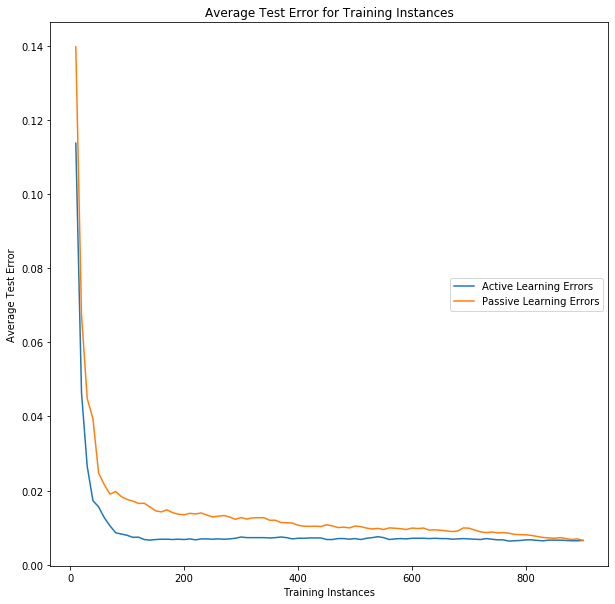

In [19]:
plt.figure(figsize=(10,10))
plt.plot(average_active_errors.transpose(), label='Active Learning Errors')
plt.plot(average_passive_errors.transpose(), label='Passive Learning Errors')
plt.xlabel('Training Instances')
plt.ylabel('Average Test Error')
plt.title('Average Test Error for Training Instances')
plt.legend(loc='right')
plt.show()

*Here we can notice that the Active learning model both grows faster and has overall better performace than passive learning. This is due to the fact that active learning slowly adds the best traning instances classified, where as passive learning just randomly chooses the traning instances to be added to the training model. Both learning curves result in the same error rate if there are enough training instances however.*